# Excercise 3.32
Evan Lim

## Part A

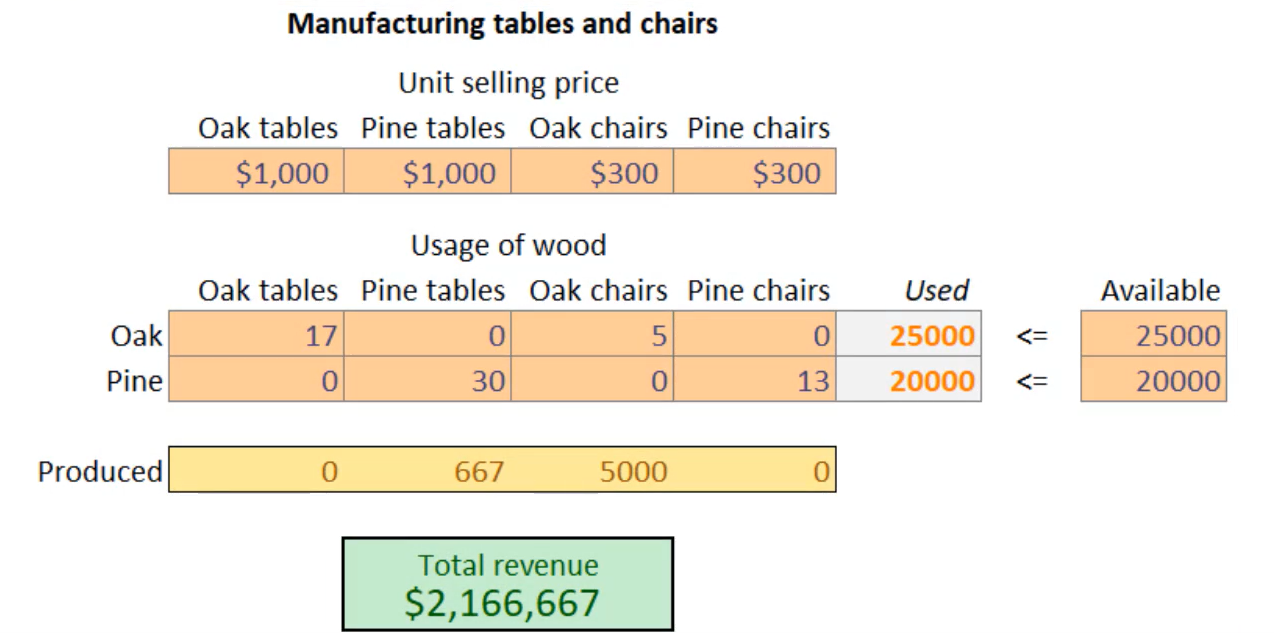

### Model Setup

In [19]:
from gurobipy import *
m = Model('ex332')

OakReq = [17,0,5,0]      # bd. ft. of oak
PineReq = [0,30,0,13]    # bd. ft. of oak
Prices = [1000,1000,300,300]    # prices per unit
OakMax = 25000
PineMax = 20000

### Decision Variables

In [20]:
N = 4    #
Xnames = ['Oak Tables','Pine Tables','Oak Chairs','Pine Chairs']
X = []   
for i in range(N):
    X.append(m.addVar(vtype = GRB.CONTINUOUS, lb = 0.0, name = Xnames[i]))
m.update()

### Constraints

$\sum_{j=0}^N{x_j c_j}$

In [21]:
m.addConstr(quicksum(X[j]*OakReq[j] for j in range(N)), GRB.LESS_EQUAL, OakMax, "Oak")
m.addConstr(quicksum(X[j]*PineReq[j] for j in range(N)), GRB.LESS_EQUAL, PineMax, "Pine")
m.update()

### Objective

In [22]:
m.setObjective(quicksum(X[j]*Prices[j] for j in range(N)), GRB.MAXIMIZE)
m.update()

### Model Output

In [23]:
m.optimize()

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (win64)
Optimize a model with 2 rows, 4 columns and 4 nonzeros
Model fingerprint: 0x1e77f5ef
Coefficient statistics:
  Matrix range     [5e+00, 3e+01]
  Objective range  [3e+02, 1e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+04, 3e+04]
Presolve removed 2 rows and 4 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.1666667e+06   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  2.166666667e+06


In [34]:
print(f"The maximized revenue is ${m.objVal:,.0f}\n")
print("The optimal production schedule is: ")
for i in range(N):
    print(f"{X[i].varName}\t: {X[i].x:.0f}")

The maximized revenue is $2,166,667

The optimal production schedule is: 
Oak Tables	: 0
Pine Tables	: 667
Oak Chairs	: 5000
Pine Chairs	: 0


## Part b

In [35]:
k = [i/10+1 for i in range(-3,4)]
k

[0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]

In [44]:
m.setParam('OutputFlag', False)  # hide Gurobi console output
rev = {}           # optimal revenue
for pine in k:
    for oak in k:
        p = [Prices[0]*oak, Prices[1]*pine, Prices[2]*oak, Prices[3]*pine]
        m.setObjective(quicksum(X[j]*p[j] for j in range(N)), GRB.MAXIMIZE)
        m.update()
        m.optimize()
        rev[(pine,oak)] = m.objVal

In [50]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [52]:
d = {}
for pine in k:
    d[f"Pine {pine}"] = [rev[pine,oak] for oak in k]
    
df = pd.DataFrame.from_dict(d)
df.index = [f"Oak {oak}" for oak in k]
df

,Pine 0.7,Pine 0.8,Pine 0.9,Pine 1.0,Pine 1.1,Pine 1.2,Pine 1.3
Oak 0.7,1516667,1583333,1650000,1716667,1783333,1850000,1916667
Oak 0.8,1666667,1733333,1800000,1866667,1933333,2000000,2066667
Oak 0.9,1816667,1883333,1950000,2016667,2083333,2150000,2216667
Oak 1.0,1966667,2033333,2100000,2166667,2233333,2300000,2366667
Oak 1.1,2116667,2183333,2250000,2316667,2383333,2450000,2516667
Oak 1.2,2266667,2333333,2400000,2466667,2533333,2600000,2666667
Oak 1.3,2416667,2483333,2550000,2616667,2683333,2750000,2816667


In [53]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

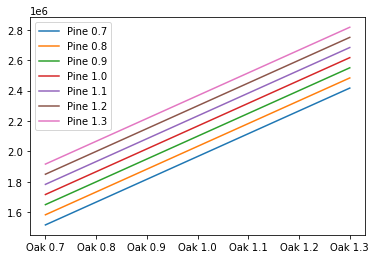

In [55]:
%matplotlib inline
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    df.plot()


##### Remarks 
As pine and oak products are varied from -30% to +30%, the optimal (maximized) revenue changes linearly.
